# Arboles de decision

Al final, toma las variables independientes, y genera cortes para clasificar los datos!.

- Este es un metodo no-parametrico
- Tiene resultados que se pueden interpretar mejor

Se puede resumir en lo siguiente:

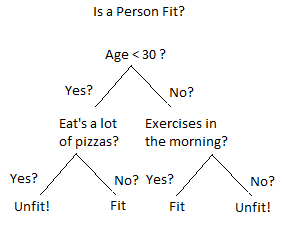

Al final, se eligen criterios de corte por variables, y eso permite clasificar a los datos!

Hay diversos criterios para decidir si un corte es bueno o no. Por ejemplo, la cantidad de cada clase en un nodo/hoja.

## Hiperparametros

- max_features: Permite elegir cuantas variables seran utilizadas para hacer los cortes en el arbol
- max_depth: Elige cuantos niveles se quiere que tenga el arbol


## Importancia Relativa

Aqui se puede ver que tan importante es un variable dentro del modelo del arbol. Al final, esto es calcular que variables discrimininan mas, y cuales discriminan menos. 

La importancia de una variable se mide con las cargas. Variables mas importantes aparecen al principio del arbol (ya que discrimina la mayor cantidad de datos).

- Cargas altas significan que la division fue mas pura
- Cargas bajas no significan que el atributo sea irrelevante. Puede que el modelo haya estimado mal los atributos

# Como se elige el mejor corte para una variable?

Se iteran por todos los cortes posibles para una variable, y se calculan las metricas de desempeno!

# Contenido de las hojas

Cada hoja puede tener diversas cantidad de cada clase. Sin embargo, al momento de clasificar, se asigna la clase que tenga la mayor probabilidad dentro de la cajita (la que tenga la mayor frecuencia).

# Como hago un arbol con una variable continua? (O sea, como hago un modelo de regresion?)

Cuando ya se hacen las cajitas de clasificacion, se promedian las observaciones de las cajitas y se asigna este promedio.

# Impureza

- En un arbol de regresion, la evaluacion de las cajitas/hojas/split se hace al medir el error cuadratico medio de cada cajita.

- En un arbol de clasificacion, se mide con:
    - Error de clasificacion
    - Gini
    - Entropia

    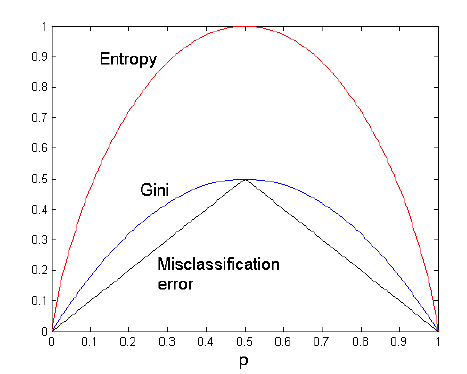

# Random Forest

Es una metodologia en donde se hacen muchos arboles (por ejemplo, en ves de 1 hacemos 1000 arboles). Luego, se obtiene el resultado de cada arbol, y se promedia (en caso de regresion) o se selecciona la categoria con mayoria de votacion

# Boosting Tree

Es un algoritmo en donde se genera 1 arbol y se ve en que se equivoco. Luego, se genera otro arbol que intenta corregir el error del arbol anterior. Por lo tanto, se va mejorando gradualmente el arbol hasta estar satisfecho

Los arboles se pueden exportar a modo texto, como tambien a modo png. En ese grafico se muestran las divisiones hechas y todo!

In [1]:
import pandas as pd
import numpy as np

import lec7_graphs as afx

In [10]:
df = pd.read_csv('vertebrate.csv')

In [12]:
X_mat = df.drop(columns=['name', 'class'])

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_mat, df['class'])
clf.predict(X_mat)

array(['mammals', 'reptiles', 'fishes', 'mammals', 'amphibians',
       'reptiles', 'mammals', 'birds', 'mammals', 'fishes', 'reptiles',
       'birds', 'mammals', 'fishes', 'amphibians'], dtype=object)

In [24]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(clf, out_file=None, feature_names=X_mat.columns,
                           filled=True, rounded=True, impurity=False)
graph = pydotplus.graph_from_dot_data(dot_data)

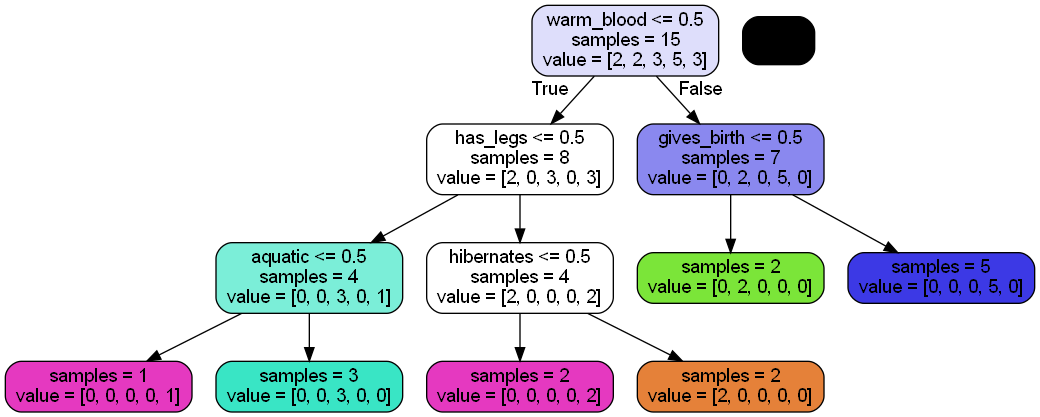

In [31]:
Image(graph.create_png())

Ojo, que si se deja el arbol sin cambiarle los hiperparametros, entonces es muy facil que caiga en overfit!. Por lo tanto, hay que cambiarlos!

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lec7_graphs as afx
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('cadata.csv', header=1).drop(columns='1')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedianHouseValue  20640 non-null  float64
 1   MedianIncome      20640 non-null  float64
 2   MedianHouseAge    20640 non-null  float64
 3   TotalRooms        20640 non-null  float64
 4   TotalBedrooms     20640 non-null  float64
 5   Population        20640 non-null  float64
 6   Households        20640 non-null  float64
 7   Latitude          20640 non-null  float64
 8   Longitude         20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


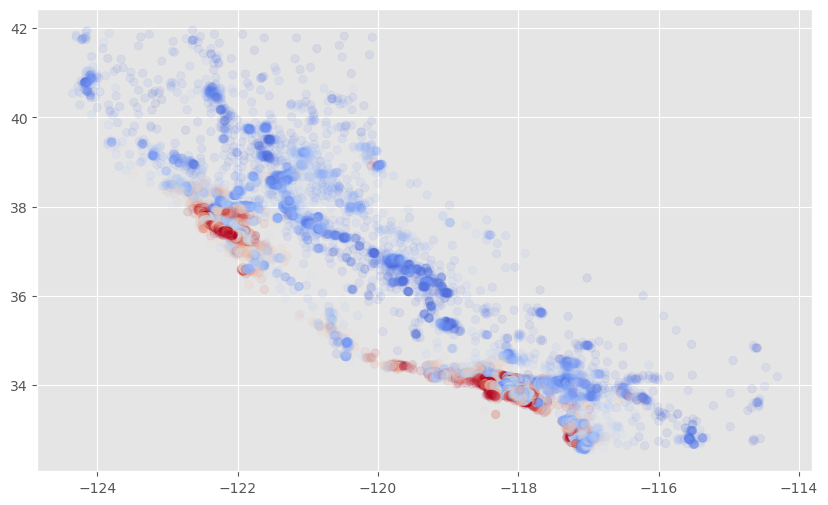

In [39]:
plt.scatter(df['Longitude'], df['Latitude'], c=df['MedianHouseValue'], cmap='coolwarm', alpha=0.1)

In [44]:
X = df.drop(columns='MedianHouseValue')
y = df['MedianHouseValue']

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_hat)}')

MAE: 61321.1341386596


# GridSearchCV con Arboles

Se puede hacer GridSearch con arboles tambien!

In [47]:
from sklearn.model_selection import GridSearchCV

grilla = {'max_depth': np.linspace(1, 32, 32).astype(int)}
modelo_grilla = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=grilla, cv=5, scoring='neg_mean_absolute_error')
modelo_grilla.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])},
             scoring='neg_mean_absolute_error')

In [48]:
modelo_grilla.best_estimator_

DecisionTreeRegressor(max_depth=13)

- Se puede controlar la aleatoriedad de los cross validations! Para eso hay que ocupar KFolds
- Con refit en el GridSearch, al final de la busqueda se fittea con todos los datos! Entonces se controla...?